In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your data in a pandas DataFrame named 'df'

# Print the first few rows of the DataFrame to see the structure of the data
print(data.head())

# Separate the target variable (the column you want to predict) from the features
target_column = 'Bodyfat'  # Replace 'target_column_name' with the name of the target column
X = data.drop(target_column, axis=1)
y = data['Bodyfat']

# Split the data into training (first 15 observations) and testing (rest 5 observations) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

   Bodyfat  Tricep_skinfold  Thigh_Circum  Midarm_circum
0     19.5             43.1          29.1           11.9
1     24.7             49.8          28.2           22.8
2     30.7             51.9          37.0           18.7
3     29.8             54.3          31.1           20.1
4     19.1             42.2          30.9           12.9
X_train shape: (15, 3)
y_train shape: (15,)
X_test shape: (5, 3)


In [21]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive root mean squared error
rmse_scores = np.sqrt(-cv_scores)

print("Root Mean Squared Error for each fold:", rmse_scores)
print("Average Root Mean Squared Error:", rmse_scores.mean())

Root Mean Squared Error for each fold: [1.80069431 1.88613361 2.60192237 4.0712406  2.67628474]
Average Root Mean Squared Error: 2.6072551247106874


In [22]:
model = DecisionTreeRegressor()

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print("R-squared for each fold:", cv_scores)
print("Average R-squared:", cv_scores.mean())

R-squared for each fold: [ 0.82432021  0.68633934  0.02123288 -0.43598346  0.83781633]
Average R-squared: 0.3867450576139741


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
import matplotlib.pyplot as plt
# Create a Decision Tree Regressor
model = DecisionTreeRegressor()

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store trees and scores
trees = []
scores = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the current fold
    model.fit(X_train, y_train)

    # Get the tree from the current fold
    tree = export_text(model, feature_names=list(X.columns))
    trees.append(tree)

    # Evaluate the model on the current fold
    score = model.score(X_test, y_test)
    scores.append(score)

# Print the R-squared scores for each fold
print("R-squared for each fold:", scores)

# Print the decision tree from the first fold
print("Decision Tree from the first fold:")
print(trees[1])







R-squared for each fold: [0.817818563543395, 0.7491596407119634, 0.28657534246575334, -0.4359834641423528, 0.7566449148495942]
Decision Tree from the first fold:
|--- Tricep_skinfold <= 49.00
|   |--- Thigh_Circum <= 22.15
|   |   |--- value: [14.60]
|   |--- Thigh_Circum >  22.15
|   |   |--- Tricep_skinfold <= 47.35
|   |   |   |--- Thigh_Circum <= 25.80
|   |   |   |   |--- value: [18.70]
|   |   |   |--- Thigh_Circum >  25.80
|   |   |   |   |--- Thigh_Circum <= 30.00
|   |   |   |   |   |--- Midarm_circum <= 14.85
|   |   |   |   |   |   |--- value: [19.50]
|   |   |   |   |   |--- Midarm_circum >  14.85
|   |   |   |   |   |   |--- value: [19.70]
|   |   |   |   |--- Thigh_Circum >  30.00
|   |   |   |   |   |--- value: [19.10]
|   |   |--- Tricep_skinfold >  47.35
|   |   |   |--- value: [22.70]
|--- Tricep_skinfold >  49.00
|   |--- Tricep_skinfold <= 51.45
|   |   |--- Tricep_skinfold <= 50.40
|   |   |   |--- value: [24.70]
|   |   |--- Tricep_skinfold >  50.40
|   |   |   |-

R-squared for each fold: [0.817818563543395, 0.7491596407119634, 0.28657534246575334, -0.2310826193757125, 0.8216351000053053]


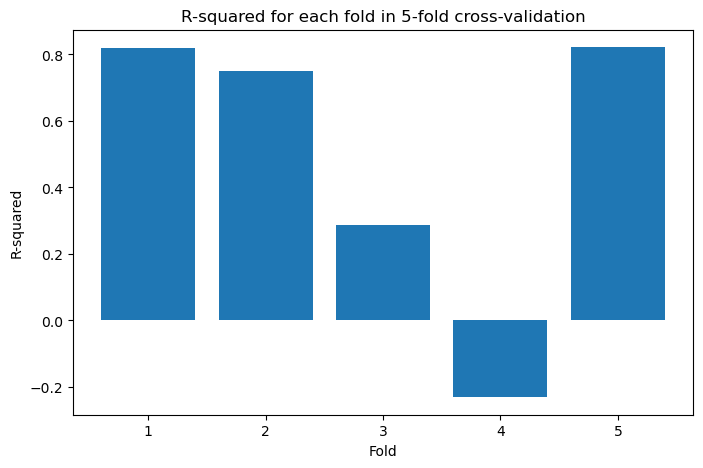

Decision Tree from the first fold:
|--- Tricep_skinfold <= 50.45
|   |--- Tricep_skinfold <= 47.35
|   |   |--- Midarm_circum <= 11.80
|   |   |   |--- value: [18.70]
|   |   |--- Midarm_circum >  11.80
|   |   |   |--- Thigh_Circum <= 30.00
|   |   |   |   |--- Thigh_Circum <= 28.85
|   |   |   |   |   |--- value: [19.70]
|   |   |   |   |--- Thigh_Circum >  28.85
|   |   |   |   |   |--- value: [19.50]
|   |   |   |--- Thigh_Circum >  30.00
|   |   |   |   |--- value: [19.10]
|   |--- Tricep_skinfold >  47.35
|   |   |--- Midarm_circum <= 22.05
|   |   |   |--- Thigh_Circum <= 25.15
|   |   |   |   |--- value: [22.10]
|   |   |   |--- Thigh_Circum >  25.15
|   |   |   |   |--- value: [22.70]
|   |   |--- Midarm_circum >  22.05
|   |   |   |--- value: [24.70]
|--- Tricep_skinfold >  50.45
|   |--- Thigh_Circum <= 27.90
|   |   |--- Tricep_skinfold <= 54.60
|   |   |   |--- Thigh_Circum <= 26.15
|   |   |   |   |--- Thigh_Circum <= 24.25
|   |   |   |   |   |--- value: [25.60]
|   |   

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
import matplotlib.pyplot as plt


model = DecisionTreeRegressor()

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
scores = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the current fold
    model.fit(X_train, y_train)

    # Evaluate the model on the current fold and store the R-squared score
    score = model.score(X_test, y_test)
    scores.append(score)

# Print the R-squared scores for each fold
print("R-squared for each fold:", scores)

# Visualize the R-squared scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(scores)+1), scores)
plt.xlabel("Fold")
plt.ylabel("R-squared")
plt.title("R-squared for each fold in 5-fold cross-validation")
plt.show()

# Get the decision tree from the first fold
tree = export_text(model, feature_names=list(X.columns))

# Print the decision tree from the first fold
print("Decision Tree from the first fold:")
print(tree)







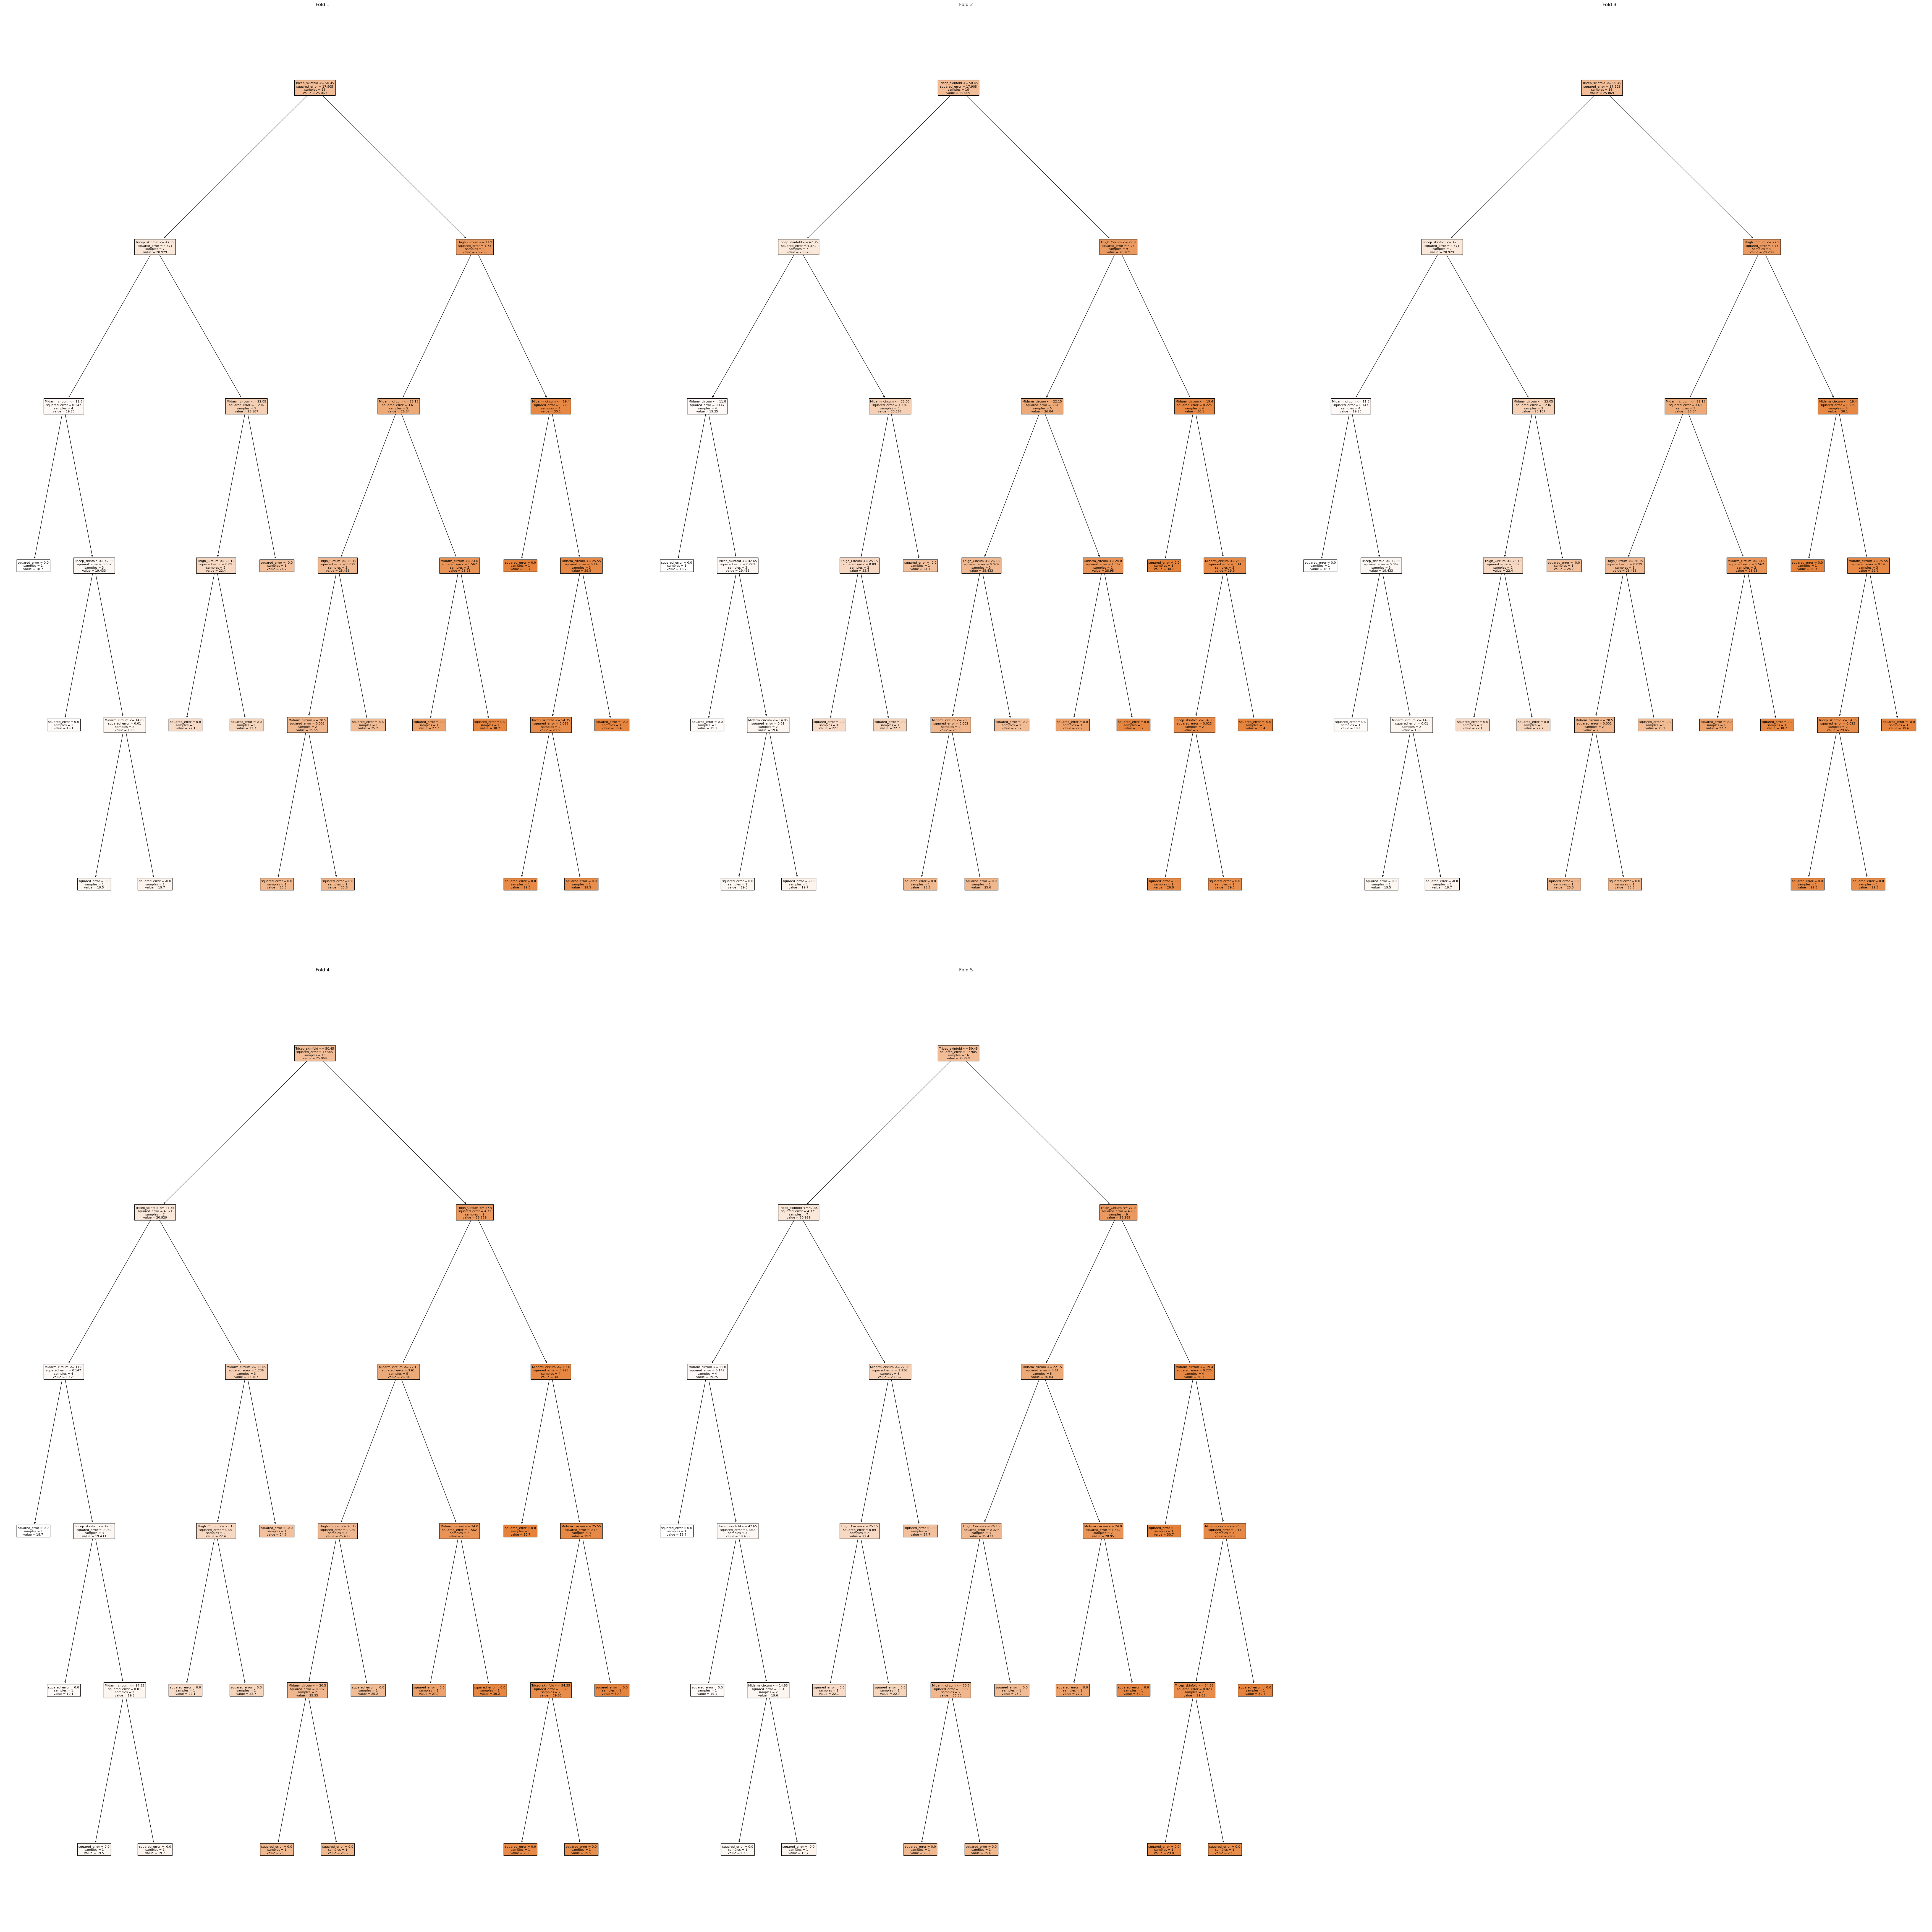

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Create a Decision Tree Regressor
model = DecisionTreeRegressor()

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store trees
trees = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the current fold
    model.fit(X_train, y_train)

    # Get the tree from the current fold
    trees.append(model)

# Visualize the decision tree from each fold
plt.figure(figsize=(70, 70))
for i, tree in enumerate(trees):
    plt.subplot(2, 3, i + 1)
    plot_tree(tree, feature_names=X.columns, filled=True)
    plt.title(f"Fold {i + 1}")
plt.tight_layout()
plt.show()



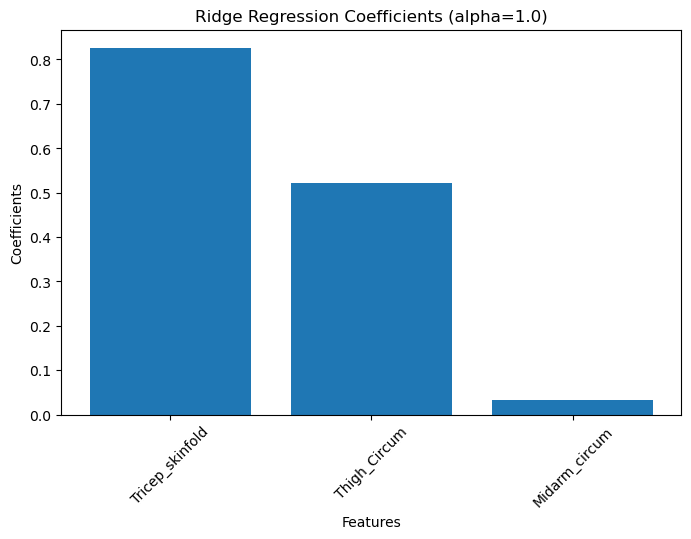

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


# Create a Ridge Regression model
alpha = 1.0  # Regularization strength (adjust this value as needed)
ridge_model = Ridge(alpha=alpha)

# Train the Ridge Regression model
ridge_model.fit(X, y)

# Get the coefficients of the features
coefficients = ridge_model.coef_

# Visualize the coefficients as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(X.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title(f'Ridge Regression Coefficients (alpha={alpha})')
plt.xticks(rotation=45)
plt.show()



In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load your binary classificati

# Extract the features (X) and target variable (y) from the data
data2 = pd.read_csv('C:/Users/ravit/Downloads/ecoli(1).csv')

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your data in a pandas DataFrame named 'df'

# Print the first few rows of the DataFrame to see the structure of the data
print(data2.head())

# Separate the target variable (the column you want to predict) from the features
target_column = 'Class'  # Replace 'target_column_name' with the name of the target column
X = data2.drop(target_column, axis=1)
y = data2['Class']

# Split the data into training (first 15 observations) and testing (rest 5 observations) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

   Mcg  Gvh  Lip  Aac  Alm1  Alm2 Class
0   63   51   48   64    72    76   yes
1   81   53   48   57    87    88   yes
2   84   54   48   75    92     7   yes
3   81   52   48   57    78     8   yes
4   76   71   48    5    71    75   yes
X_train shape: (235, 6)
y_train shape: (235,)
X_test shape: (101, 6)
y_test shape: (101,)


Accuracy: 0.8676470588235294
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.93      0.93        61
         yes       0.33      0.29      0.31         7

    accuracy                           0.87        68
   macro avg       0.63      0.61      0.62        68
weighted avg       0.86      0.87      0.86        68

Confusion Matrix:
[[57  4]
 [ 5  2]]
Misclassification Rate: 0.13235294117647056


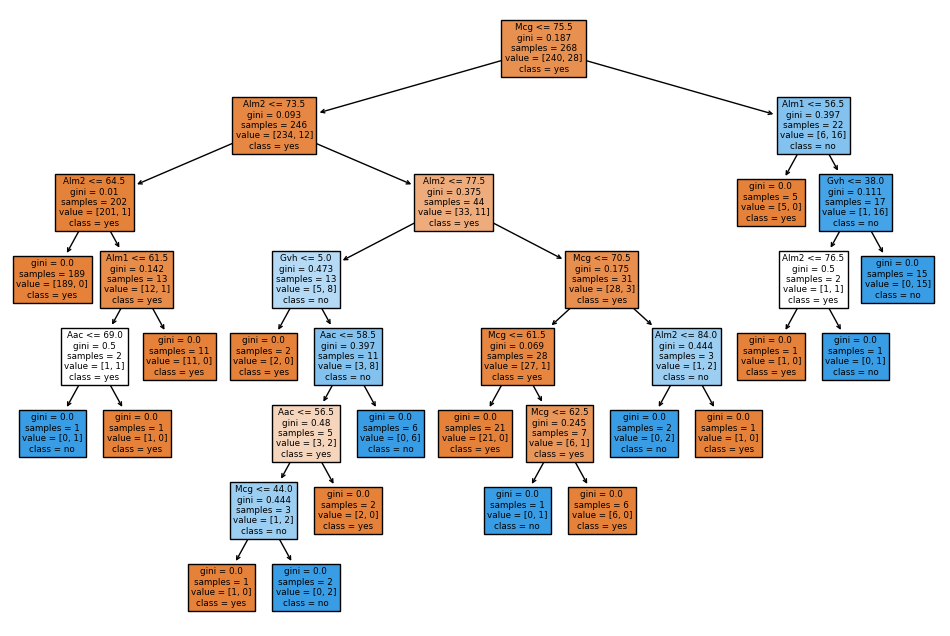

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your dataset or replace this with your actual data in a pandas DataFrame
# Make sure you have X (features) and y (target variable) defined correctly
# Example:
#

# Separate the target variable (the column you want to predict) from the features
target_column = 'Class'  # Replace 'target_column_name' with the name of the target column
X = data2.drop(target_column, axis=1)
y = data2['Class']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use different metrics based on your needs)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

print("Misclassification Rate:", misclassification_rate)

# Visualize the tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=data2['Class'].unique().astype(str), filled=True)
plt.show()


Accuracy: 0.8676470588235294
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.93      0.93        61
         yes       0.33      0.29      0.31         7

    accuracy                           0.87        68
   macro avg       0.63      0.61      0.62        68
weighted avg       0.86      0.87      0.86        68

Confusion Matrix:
[[57  4]
 [ 5  2]]
Misclassification Rate: 0.13235294117647056


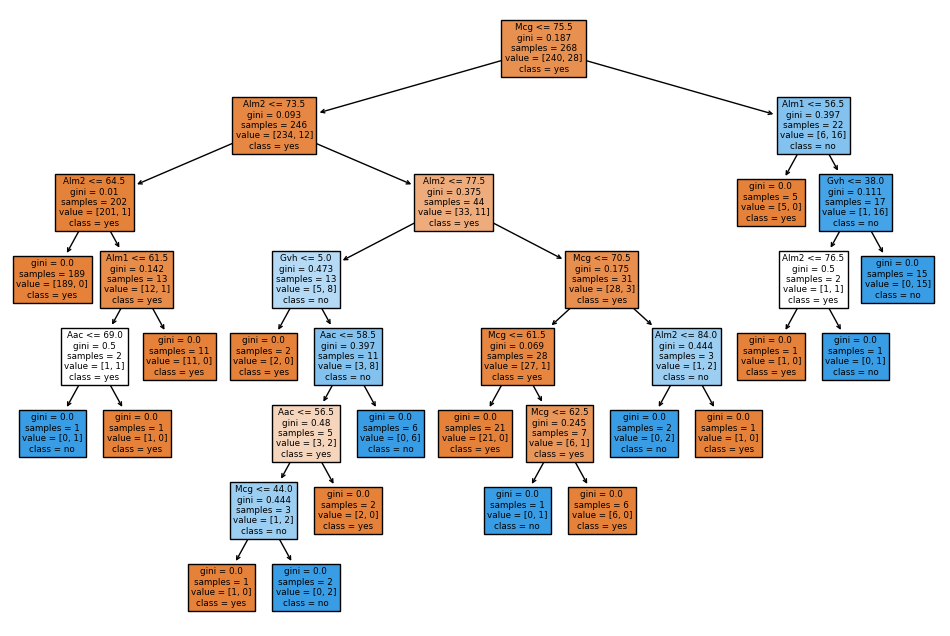

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your dataset or replace this with your actual data in a pandas DataFrame
# Make sure you have X (features) and y (target variable) defined correctly
# Example:
#

# Separate the target variable (the column you want to predict) from the features
target_column = 'Class'  # Replace 'target_column_name' with the name of the target column
X = data2.drop(target_column, axis=1)
y = data2['Class']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use different metrics based on your needs)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

misclassification_rate = 1 - accuracy_score(y_test, y_pred)

print("Misclassification Rate:", misclassification_rate)

# Visualize the tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=data2['Class'].unique().astype(str), filled=True)
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier model
n_estimators = 100  # Number of decision trees in the forest
model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

print("Misclassification Rate:", misclassification_rate)

Accuracy: 0.8823529411764706
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94        61
         yes       0.33      0.14      0.20         7

    accuracy                           0.88        68
   macro avg       0.62      0.56      0.57        68
weighted avg       0.85      0.88      0.86        68

Confusion Matrix:
[[59  2]
 [ 6  1]]
Misclassification Rate: 0.11764705882352944


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the SVM classifier
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

print("Misclassification Rate:", misclassification_rate)

Accuracy: 0.8529411764705882
Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.95      0.92        61
         yes       0.00      0.00      0.00         7

    accuracy                           0.85        68
   macro avg       0.45      0.48      0.46        68
weighted avg       0.80      0.85      0.83        68

Confusion Matrix:
[[58  3]
 [ 7  0]]
Misclassification Rate: 0.1470588235294118


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the neural network classifier
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Decode the predicted labels back to original string format
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

print("Misclassification Rate:", misclassification_rate)

Epoch 1/50
9/9 [==============================] - 1s 3ms/step - loss: 0.6798 - accuracy: 0.5522
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.8955
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8955
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8955
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8955
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8955
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.8955
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9142
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9216
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9366
Epoch 11/50
9/9 [======================